# MIDS DATASCI 205 Project 3 Initial Data Tests

## Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import warnings

## Data Loading

In [2]:
# Loading in stock data
data = pd.read_csv("SP500_4y_day_data.csv", index_col='Date', parse_dates=True)

In [3]:
# Converting Date_col to datetime format
data['Date_col'] = pd.to_datetime(data['Date_col'])

In [4]:
data

,Date_col,Ticker,Open,High,Low,Close,Volume,rank
Date,,,,,,,,
2021-01-04,2021-01-04,A,115.875028,116.995388,114.092184,115.582756,2030700.0,1.0
2021-01-05,2021-01-05,A,115.426870,117.219451,115.027432,116.527748,2344000.0,2.0
2021-01-06,2021-01-06,A,115.631454,120.687707,115.163820,119.723221,2428500.0,3.0
2021-01-07,2021-01-07,A,121.126122,124.194950,120.911790,122.908966,1775900.0,4.0
2021-01-08,2021-01-08,A,123.230471,124.350838,122.606963,123.785782,1577200.0,5.0
...,...,...,...,...,...,...,...,...
2024-12-24,2024-12-24,ZTS,163.206597,164.542554,162.249499,164.203583,1023600.0,1001.0
2024-12-26,2024-12-26,ZTS,163.226540,165.290293,162.528653,165.021118,2167200.0,1002.0
2024-12-27,2024-12-27,ZTS,164.452833,166.028073,163.027150,164.103897,1800100.0,1003.0


## Initial Feature Engineering

In [5]:
# Getting S&P500 current list of stocks and their sectors/sub-industries
sp500_tables = pd.read_csv('SP500_Tickers_March_2025.csv', index_col='Unnamed: 0')
sp500_tables.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
# Getting the sector and sub-industries for stocks as another feature
ticker_and_sector = sp500_tables[['Symbol', 'GICS Sector', 'GICS Sub-Industry']]

# Getting the GICS sector and sub-industries into the table through a merge function
data = data.reset_index().merge(ticker_and_sector, left_on='Ticker', right_on='Symbol', how='left').set_index('Date')
data = data.drop(columns=['Symbol'])

# Replacing NaN GICS Sectors and Sub-Industries with Other
data['GICS Sector'] = data['GICS Sector'].fillna('Other')
data['GICS Sub-Industry'] = data['GICS Sub-Industry'].fillna('Other')

data.head()

,Date_col,Ticker,Open,High,Low,Close,Volume,rank,GICS Sector,GICS Sub-Industry
Date,,,,,,,,,,
2021-01-04,2021-01-04,A,115.875028,116.995388,114.092184,115.582756,2030700.0,1.0,Health Care,Life Sciences Tools & Services
2021-01-05,2021-01-05,A,115.426870,117.219451,115.027432,116.527748,2344000.0,2.0,Health Care,Life Sciences Tools & Services
2021-01-06,2021-01-06,A,115.631454,120.687707,115.163820,119.723221,2428500.0,3.0,Health Care,Life Sciences Tools & Services
2021-01-07,2021-01-07,A,121.126122,124.194950,120.911790,122.908966,1775900.0,4.0,Health Care,Life Sciences Tools & Services
2021-01-08,2021-01-08,A,123.230471,124.350838,122.606963,123.785782,1577200.0,5.0,Health Care,Life Sciences Tools & Services


In [7]:
# Removing BIIB ticker (since it's missing data for one of the trading days)
data = data[data['Ticker'] != 'BIIB']

In [8]:
# Ordering by date, and then by ticker (for easier data splits later)
data = data.sort_values(by=['Date_col', 'Ticker'])

data.head()

,Date_col,Ticker,Open,High,Low,Close,Volume,rank,GICS Sector,GICS Sub-Industry
Date,,,,,,,,,,
2021-01-04,2021-01-04,A,115.875028,116.995388,114.092184,115.582756,2030700.0,1.0,Health Care,Life Sciences Tools & Services
2021-01-04,2021-01-04,AAL,15.850000,15.880000,15.030000,15.130000,69732500.0,1.0,Other,Other
2021-01-04,2021-01-04,AAP,143.540121,145.058259,141.776562,143.031052,849100.0,1.0,Other,Other
2021-01-04,2021-01-04,AAPL,130.419822,130.507728,123.816779,126.405251,143301900.0,1.0,Information Technology,"Technology Hardware, Storage & Peripherals"
2021-01-04,2021-01-04,ABBV,90.427306,90.570733,87.626237,88.933968,9523400.0,1.0,Health Care,Biotechnology


In [9]:
# Getting date index column (might come in handy later)
date_index = data.index.sort_values()
date_index = date_index.drop_duplicates()  # Dropping duplicates

date_index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=1005, freq=None)

# Finding Correlation Between Stock Price Changes
The main goal here is to find a way to quantify relationships between different stocks (our nodes). This first idea would be to use daily percent changes in stock prices to see if we can find general patterns between different tickers. More specifically, we can find the correlation between every pair of tickers by comparing their daily Close price percent changes over a specific time period. Our dataset includes 4 years of data from the beginning of 2021 to the end of 2024, and we'll use the first 3 years to find this correlation, saving the last year of data for other analyses.

In [10]:
# Creating the dataframe with just the close prices from 2021-2023 for every ticker
data_corr = data.copy()
date_limit = pd.to_datetime('2024-01-01')
data_corr = data_corr[data_corr['Date_col'] < date_limit]

data_corr

,Date_col,Ticker,Open,High,Low,Close,Volume,rank,GICS Sector,GICS Sub-Industry
Date,,,,,,,,,,
2021-01-04,2021-01-04,A,115.875028,116.995388,114.092184,115.582756,2030700.0,1.0,Health Care,Life Sciences Tools & Services
2021-01-04,2021-01-04,AAL,15.850000,15.880000,15.030000,15.130000,69732500.0,1.0,Other,Other
2021-01-04,2021-01-04,AAP,143.540121,145.058259,141.776562,143.031052,849100.0,1.0,Other,Other
2021-01-04,2021-01-04,AAPL,130.419822,130.507728,123.816779,126.405251,143301900.0,1.0,Information Technology,"Technology Hardware, Storage & Peripherals"
2021-01-04,2021-01-04,ABBV,90.427306,90.570733,87.626237,88.933968,9523400.0,1.0,Health Care,Biotechnology
...,...,...,...,...,...,...,...,...,...,...
2023-12-29,2023-12-29,YUM,127.865397,128.689004,127.669303,128.110519,1196800.0,753.0,Consumer Discretionary,Restaurants
2023-12-29,2023-12-29,ZBH,120.423869,121.355853,120.205744,120.661819,849600.0,753.0,Health Care,Health Care Equipment
2023-12-29,2023-12-29,ZBRA,274.730011,276.309998,272.769989,273.329987,251300.0,753.0,Information Technology,Electronic Equipment & Instruments


In [11]:
# Creating percent changes from the previous close price
data_corr = data_corr.sort_values(by=['Ticker', 'Date_col'])
data_corr['PDC'] = data_corr['Close'].shift(1)
data_corr['PDC_Perc_Change'] = (data_corr['Close'] - data_corr['PDC']) / data_corr['PDC'] * 100

# Dropping all rank 1 for all tickers (since there is no previous day measurement for that ticker)
data_corr = data_corr[data_corr['rank'] != 1]

data_corr

,Date_col,Ticker,Open,High,Low,Close,Volume,rank,GICS Sector,GICS Sub-Industry,PDC,PDC_Perc_Change
Date,,,,,,,,,,,,
2021-01-05,2021-01-05,A,115.426870,117.219451,115.027432,116.527748,2344000.0,2.0,Health Care,Life Sciences Tools & Services,115.582756,0.817589
2021-01-06,2021-01-06,A,115.631454,120.687707,115.163820,119.723221,2428500.0,3.0,Health Care,Life Sciences Tools & Services,116.527748,2.742242
2021-01-07,2021-01-07,A,121.126122,124.194950,120.911790,122.908966,1775900.0,4.0,Health Care,Life Sciences Tools & Services,119.723221,2.660925
2021-01-08,2021-01-08,A,123.230471,124.350838,122.606963,123.785782,1577200.0,5.0,Health Care,Life Sciences Tools & Services,122.908966,0.713386
2021-01-11,2021-01-11,A,123.191505,126.007032,122.977180,124.847694,1746800.0,6.0,Health Care,Life Sciences Tools & Services,123.785782,0.857863
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2023-12-22,ZTS,192.821563,193.404013,190.274564,192.485901,1548400.0,749.0,Health Care,Pharmaceuticals,192.169998,0.164387
2023-12-26,2023-12-26,ZTS,192.387218,193.828534,191.607315,192.999283,814600.0,750.0,Health Care,Pharmaceuticals,192.485901,0.266711
2023-12-27,2023-12-27,ZTS,192.910417,194.489941,192.248989,194.381348,766400.0,751.0,Health Care,Pharmaceuticals,192.999283,0.716098


In [12]:
# Testing correlation with just MSFT and AAPL
data_MSFT = data_corr[data_corr['Ticker'] == 'MSFT']['PDC_Perc_Change']
data_AAPL = data_corr[data_corr['Ticker'] == 'AAPL']['PDC_Perc_Change']
data_MSFT_AAPL = pd.concat([data_MSFT, data_AAPL], axis=1)

data_MSFT_AAPL.corr()

,PDC_Perc_Change,PDC_Perc_Change
PDC_Perc_Change,1.00000,0.72212
PDC_Perc_Change,0.72212,1.00000


In [13]:
# Getting a pivot table and then getting correlation for percent changes between all tickers
data_pivot = data_corr.pivot(index='Date_col', columns='Ticker', values='PDC_Perc_Change')

data_pivot

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date_col,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.817589,1.982817,-0.108037,1.236375,1.034070,1.237272,0.569303,0.072116,1.787432,1.945055,...,-0.974733,4.819273,2.865108,1.736434,-0.120375,0.009456,1.730216,0.645281,1.583963,0.696867
2021-01-06,2.742242,0.583280,5.777164,-3.366165,-0.863874,-0.208201,1.093352,-3.990200,0.450776,4.051957,...,2.214741,2.551699,4.829092,1.531716,4.218132,0.548044,2.849617,3.744383,11.235974,1.469070
2021-01-07,2.660925,-0.902064,0.854137,3.412324,1.070279,0.970684,0.943487,2.451158,4.226412,-0.888501,...,-1.956070,0.784603,-0.517609,1.637941,4.538893,-0.761225,-0.592816,3.616838,3.050914,-0.089725
2021-01-08,0.713386,-1.625488,1.425413,0.863156,0.524782,0.278524,0.364703,1.540590,0.726145,0.267048,...,0.920787,1.112094,0.901838,-0.127207,-1.014003,1.467836,-0.219719,-0.887315,-2.540516,0.664644
2021-01-11,0.857863,-0.859221,0.564507,-2.324906,1.631410,-0.689900,-1.442283,-2.238717,0.995285,-1.008197,...,-2.068114,3.035645,0.550040,-0.467123,-1.266535,0.485283,0.031446,2.051942,2.360418,0.761441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.453456,-0.278745,0.922729,-0.554753,1.540083,0.506990,1.634421,-0.231615,0.417770,0.747207,...,0.861366,0.176935,0.085268,-0.372925,0.850567,0.015391,0.760554,1.545364,0.871168,0.164387
2023-12-26,0.171936,-1.397629,-0.538778,-0.284078,-0.206532,0.183441,-0.287791,-0.081836,0.898015,1.301433,...,0.306156,0.225692,0.908567,0.588220,0.870025,0.200013,0.914234,2.260494,2.000010,0.266711
2023-12-27,0.007166,-0.850460,1.050568,0.051780,0.168166,0.512669,0.110353,-0.364389,0.241367,-0.303914,...,-0.307794,-0.469936,0.253241,0.691144,0.668894,0.445243,-0.238843,0.105266,-0.824421,0.716098


In [14]:
# Getting the correlation between all the tickers
corr_matrix = data_pivot.corr()

corr_matrix

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.288296,0.297601,0.481627,0.230737,0.547876,0.559315,0.502190,0.547926,0.291955,...,0.280654,0.155327,0.391287,0.310671,0.544600,0.428591,0.411821,0.500316,0.304766,0.611552
AAL,0.288296,1.000000,0.275185,0.370001,0.076942,0.216267,0.376497,0.302461,0.417970,0.223873,...,0.031270,0.205551,0.303885,0.431423,0.415221,0.325717,0.370148,0.384630,0.424736,0.241104
AAP,0.297601,0.275185,1.000000,0.225208,0.179816,0.203256,0.333935,0.206804,0.257699,0.252112,...,0.178343,0.201050,0.247385,0.273261,0.316834,0.276795,0.246705,0.317820,0.387384,0.263488
AAPL,0.481627,0.370001,0.225208,1.000000,0.165951,0.421713,0.617872,0.640424,0.614664,0.216185,...,0.289445,0.175569,0.337835,0.331757,0.475989,0.416283,0.389156,0.533641,0.280394,0.522469
ABBV,0.230737,0.076942,0.179816,0.165951,1.000000,0.330503,0.243717,0.128083,0.191774,0.254390,...,0.280091,0.201918,0.215675,0.136441,0.190196,0.208779,0.267662,0.105690,0.182563,0.289343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.428591,0.325717,0.276795,0.416283,0.208779,0.400571,0.467030,0.373420,0.430905,0.290719,...,0.339366,0.226049,0.326376,0.323119,0.486477,1.000000,0.427481,0.417868,0.273122,0.436787
ZBH,0.411821,0.370148,0.246705,0.389156,0.267662,0.458118,0.443316,0.336276,0.405859,0.271522,...,0.274933,0.238591,0.442250,0.387915,0.443737,0.427481,1.000000,0.376203,0.331207,0.360940
ZBRA,0.500316,0.384630,0.317820,0.533641,0.105690,0.385743,0.555034,0.492406,0.613042,0.271520,...,0.170975,0.221601,0.364569,0.414447,0.455777,0.417868,0.376203,1.000000,0.395393,0.495535


In [15]:
# Stacking and resetting the index
corr_df = corr_matrix.stack().reset_index(level=(1,), name='Correlation')
corr_df = corr_df.rename(columns={'Ticker': 'Ticker_2'})
corr_df = corr_df.reset_index()
corr_df = corr_df.rename(columns={'Ticker': 'Ticker_1'})

corr_df

,Ticker_1,Ticker_2,Correlation
0,A,A,1.000000
1,A,AAL,0.288296
2,A,AAP,0.297601
3,A,AAPL,0.481627
4,A,ABBV,0.230737
...,...,...,...
225620,ZTS,YUM,0.436787
225621,ZTS,ZBH,0.360940
225622,ZTS,ZBRA,0.495535
225623,ZTS,ZION,0.249582


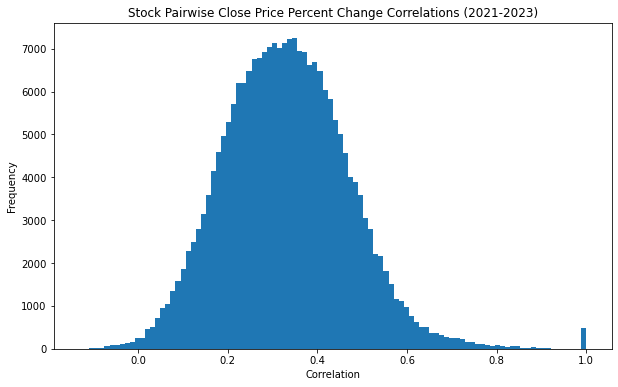

In [16]:
# Getting a histogram of the correlations
plt.figure(figsize=(10, 6))
plt.hist(corr_df['Correlation'], bins=100,)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Stock Pairwise Close Price Percent Change Correlations (2021-2023)')
plt.show()

In [17]:
# Double-checking values (like AAPL with MSFT)
corr_df[(corr_df['Ticker_1'] == 'AAPL') & (corr_df['Ticker_2'] == 'MSFT')]

,Ticker_1,Ticker_2,Correlation
1722,AAPL,MSFT,0.72212


# Checking the sectors of stocks with high correlation

In [18]:
# Removing all stocks with correlation to themselves (i.e., when Ticker_1 is equal to Ticker_2)
corr_df = corr_df[corr_df['Ticker_1'] != corr_df['Ticker_2']]

# Getting all the unique tickers for use later
unique_tickers = corr_df['Ticker_1'].unique().tolist()

In [29]:
# Manually finding the maximum correlation where every ticker is represented (so one, large connected graph)
max_correlation_required = 0.32
num_unique_stocks_w_min_corr = corr_df.loc[corr_df['Correlation'] > max_correlation_required, 'Ticker_1'].nunique()

if num_unique_stocks_w_min_corr == len(unique_tickers):
    print("With a correlation of " + str(max_correlation_required) + ", all " + str(num_unique_stocks_w_min_corr) +
        " tickers are represented in the data.")
else:
    print("With a correlation of " + str(max_correlation_required) + ", only " + str(num_unique_stocks_w_min_corr)
        + " tickers are represented in the data.")

With a correlation of 0.32, all 475 tickers are represented in the data.


For convenience - and also to have at least a few more connections in the graph - we will set the minimum correlation threshold to 0.3. By doing so, any tickers that have a correlation of 0.3 or higher with any other ticker will be connected, hopefully allowing us to find communities of stocks.

In [20]:
# Creating a new correlation df with a threshold of 0.3
corr_df_thresh = corr_df[corr_df['Correlation'] >= 0.3]

corr_df_thresh

,Ticker_1,Ticker_2,Correlation
3,A,AAPL,0.481627
5,A,ABT,0.547876
6,A,ACN,0.559315
7,A,ADBE,0.502190
8,A,ADI,0.547926
...,...,...,...
225617,ZTS,XRAY,0.373792
225619,ZTS,XYL,0.438852
225620,ZTS,YUM,0.436787
225621,ZTS,ZBH,0.360940


In [21]:
# Checking out AAPL stock and seeing some of the stocks it might be highly correlated to
corr_AAPL = corr_df_thresh[corr_df_thresh['Ticker_1'] == 'AAPL']
corr_AAPL = corr_AAPL.sort_values(by='Correlation', ascending=False)

corr_AAPL.head()

,Ticker_1,Ticker_2,Correlation
1722,AAPL,MSFT,0.722120
1614,AAPL,GOOGL,0.665338
1613,AAPL,GOOG,0.661848
1432,AAPL,ADBE,0.640424
1821,AAPL,SWKS,0.639541


In [22]:
# Checking out JNJ stock and seeing some of the stocks it might be highly correlated to
corr_JNJ = corr_df_thresh[corr_df_thresh['Ticker_1'] == 'JNJ']
corr_JNJ = corr_JNJ.sort_values(by='Correlation', ascending=False)

corr_JNJ.head()

,Ticker_1,Ticker_2,Correlation
113386,JNJ,PEP,0.502760
113389,JNJ,PG,0.502048
113079,JNJ,AMGN,0.481398
113137,JNJ,CL,0.475437
113300,JNJ,KO,0.471822


With these two experiments using Apple (tech) and Johnson & Johnson (biopharma), we see the top stocks with the highest correlation, and the results mostly seem to make sense. With AAPL, the tickers with the highest correlation are MSFT, GOOGL, GOOG, ADBE, and SWKS, which most people would likely associate together as they are all in the technology sector.

JNJ has high correlations with PG (Proctor & Gamble) and CL (Colgate), which makes sense since they all have a consumer-facing sectors. Conversely, JNJ also has a high correlation with AMGN (Amgen), likely due to their pharmaceutical sides. What's interesting is the high correlation between JNJ and both PEP (PepsiCo) and KO (Coca-Cola), as we would normally not associate these companies together. One possibility might their similar market caps, as they are roughly in the range as each other. Another possibility could just be that these stocks have always traditionally done well, and due to both appearing on the S&P500, they naturally share similar patterns.

In either case, these correlation values make quite a bit of sense, and it's likely enough for us to start integrating these into a graph.

In [24]:
# Getting just the original correlation dataframe into a csv file for easier access later
corr_df.to_csv('SP500_Corr_PDC_Pct_Chg.csv')

# Visualizing Different Stock Price Graphs

In [28]:
# Creating correlation dfs for PRU (highest corr) and SEE (lowest corr) to see how correlated different stocks
# are to them
corr_PRU = corr_df_thresh[corr_df_thresh['Ticker_1'] == 'PRU']
corr_PRU = corr_PRU.sort_values(by='Correlation', ascending=False)
corr_SEE = corr_df_thresh[corr_df_thresh['Ticker_1'] == 'SEE']
corr_SEE = corr_SEE.sort_values(by='Correlation', ascending=False)

In [30]:
# Checking out correlation df for AAPL to find its highest and lowest correlation
corr_AAPL

,Ticker_1,Ticker_2,Correlation
1722,AAPL,MSFT,0.722120
1614,AAPL,GOOGL,0.665338
1613,AAPL,GOOG,0.661848
1432,AAPL,ADBE,0.640424
1821,AAPL,SWKS,0.639541
...,...,...,...
1491,AAPL,BXP,0.303403
1789,AAPL,RF,0.301387
1887,AAPL,WU,0.301332
1680,AAPL,LH,0.301126


In [31]:
# Checking out correlation df for PRU to find its highest and lowest correlation
corr_PRU

,Ticker_1,Ticker_2,Correlation
167956,PRU,MET,0.894975
168013,PRU,PFG,0.865436
167691,PRU,AIG,0.817864
167705,PRU,AMP,0.813287
167846,PRU,FITB,0.809653
...,...,...,...
168086,PRU,TMUS,0.305764
168121,PRU,VZ,0.305422
167831,PRU,EVRG,0.305397
168090,PRU,TSCO,0.303407


In [32]:
# Checking out correlation df for SEE to find its highest and lowest correlation
corr_SEE

,Ticker_1,Ticker_2,Correlation
180526,SEE,AMCR,0.670795
180647,SEE,EMN,0.600092
180732,SEE,ITW,0.596514
180545,SEE,AVY,0.595637
180850,SEE,PPG,0.586008
...,...,...,...
180746,SEE,KLAC,0.303661
180715,SEE,IBM,0.303229
180519,SEE,AKAM,0.301573
180930,SEE,UNM,0.301356


In [83]:
# Getting a new df for data before 2024
cutoff_date_2024 = pd.to_datetime('2024-01-01')
data_21_23 = data_corr[data_corr['Date_col'] < cutoff_date_2024]

# Getting dfs for AAPL, MSFT, VTR, PRU, MET, DHR, SEE, AMCR, ED
data_21_23_AAPL = data_21_23[data_21_23['Ticker'] == 'AAPL']
data_21_23_MSFT = data_21_23[data_21_23['Ticker'] == 'MSFT']
data_21_23_VTR = data_21_23[data_21_23['Ticker'] == 'VTR']
data_21_23_PRU = data_21_23[data_21_23['Ticker'] == 'PRU']
data_21_23_MET = data_21_23[data_21_23['Ticker'] == 'MET']
data_21_23_DHR = data_21_23[data_21_23['Ticker'] == 'DHR']
data_21_23_SEE = data_21_23[data_21_23['Ticker'] == 'SEE']
data_21_23_AMCR = data_21_23[data_21_23['Ticker'] == 'AMCR']
data_21_23_ED = data_21_23[data_21_23['Ticker'] == 'ED']

# Getting smoothed percent change curves for visualization
data_21_23_AAPL['Smoothed'] = data_21_23_AAPL['PDC_Perc_Change'].rolling(30).mean()
data_21_23_MSFT['Smoothed'] = data_21_23_MSFT['PDC_Perc_Change'].rolling(30).mean()
data_21_23_VTR['Smoothed'] = data_21_23_VTR['PDC_Perc_Change'].rolling(30).mean()
data_21_23_PRU['Smoothed'] = data_21_23_PRU['PDC_Perc_Change'].rolling(30).mean()
data_21_23_MET['Smoothed'] = data_21_23_MET['PDC_Perc_Change'].rolling(30).mean()
data_21_23_DHR['Smoothed'] = data_21_23_DHR['PDC_Perc_Change'].rolling(30).mean()
data_21_23_SEE['Smoothed'] = data_21_23_SEE['PDC_Perc_Change'].rolling(30).mean()
data_21_23_AMCR['Smoothed'] = data_21_23_AMCR['PDC_Perc_Change'].rolling(30).mean()
data_21_23_ED['Smoothed'] = data_21_23_ED['PDC_Perc_Change'].rolling(30).mean()

# Getting more dfs for data in just 2023 for visualization
cutoff_date_2023 = pd.to_datetime('2023-01-01')
data_23_AAPL = data_21_23_AAPL[data_21_23_AAPL['Date_col'] >= cutoff_date_2023]
data_23_MSFT = data_21_23_MSFT[data_21_23_MSFT['Date_col'] >= cutoff_date_2023]
data_23_VTR = data_21_23_VTR[data_21_23_VTR['Date_col'] >= cutoff_date_2023]
data_23_PRU = data_21_23_PRU[data_21_23_PRU['Date_col'] >= cutoff_date_2023]
data_23_MET = data_21_23_MET[data_21_23_MET['Date_col'] >= cutoff_date_2023]
data_23_DHR = data_21_23_DHR[data_21_23_DHR['Date_col'] >= cutoff_date_2023]
data_23_SEE = data_21_23_SEE[data_21_23_SEE['Date_col'] >= cutoff_date_2023]
data_23_AMCR = data_21_23_AMCR[data_21_23_AMCR['Date_col'] >= cutoff_date_2023]
data_23_ED = data_21_23_ED[data_21_23_ED['Date_col'] >= cutoff_date_2023]

warnings.filterwarnings('ignore')

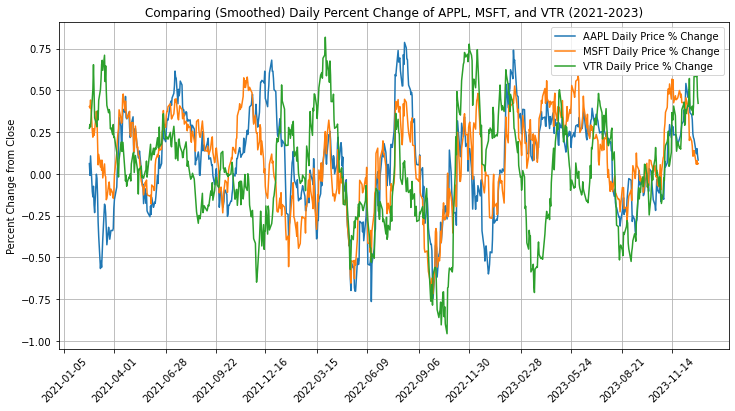

In [89]:
# Plotting AAPL correlations against MSFT and VTR
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_21_23_AAPL.index, data_21_23_AAPL['Smoothed'], label='AAPL Daily Price % Change')
ax.plot(data_21_23_MSFT.index, data_21_23_MSFT['Smoothed'], label='MSFT Daily Price % Change')
ax.plot(data_21_23_VTR.index, data_21_23_VTR['Smoothed'], label='VTR Daily Price % Change')

# Setting x-axis ticks every 60 days
every_n = 60
ax.set_xticks(data_21_23_AAPL.index[::every_n])
ax.tick_params(axis='x', rotation=45)
ax.set_title("Comparing (Smoothed) Daily Percent Change of APPL, MSFT, and VTR (2021-2023)")
ax.set_ylabel("Percent Change from Close")
ax.grid(True)
ax.legend()
plt.show()

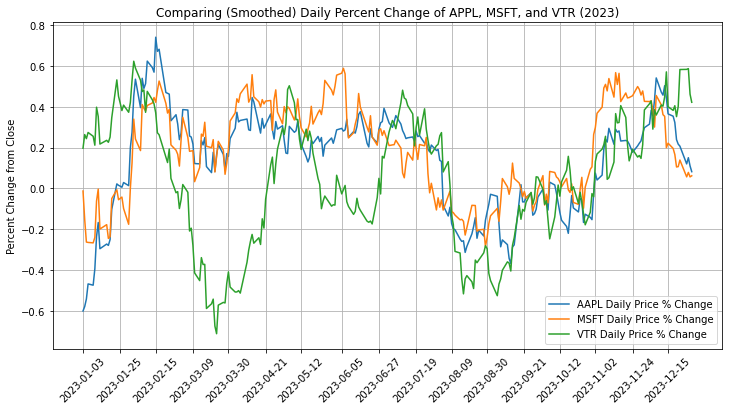

In [88]:
# Plotting AAPL correlations against MSFT and VTR
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_23_AAPL.index, data_23_AAPL['Smoothed'], label='AAPL Daily Price % Change')
ax.plot(data_23_MSFT.index, data_23_MSFT['Smoothed'], label='MSFT Daily Price % Change')
ax.plot(data_23_VTR.index, data_23_VTR['Smoothed'], label='VTR Daily Price % Change')

# Setting x-axis ticks every 15 days
every_n = 15
ax.set_xticks(data_23_AAPL.index[::every_n])
ax.tick_params(axis='x', rotation=45)
ax.set_title("Comparing (Smoothed) Daily Percent Change of APPL, MSFT, and VTR (2023)")
ax.set_ylabel("Percent Change from Close")
ax.grid(True)
ax.legend()
plt.show()

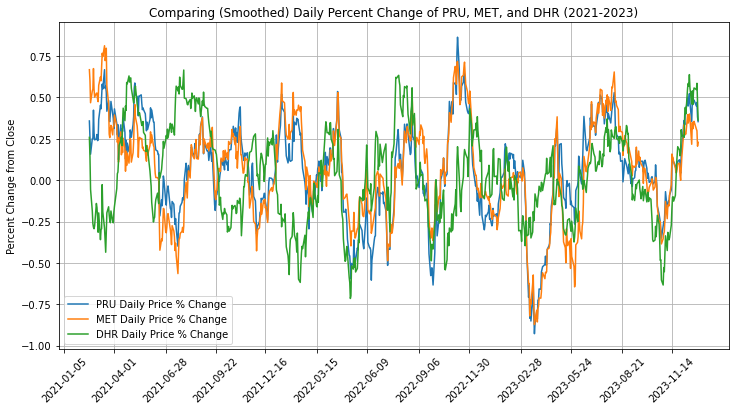

In [90]:
# Plotting PRU correlations against MET and DHR
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_21_23_PRU.index, data_21_23_PRU['Smoothed'], label='PRU Daily Price % Change')
ax.plot(data_21_23_MET.index, data_21_23_MET['Smoothed'], label='MET Daily Price % Change')
ax.plot(data_21_23_DHR.index, data_21_23_DHR['Smoothed'], label='DHR Daily Price % Change')

# Setting x-axis ticks every 60 days
every_n = 60
ax.set_xticks(data_21_23_PRU.index[::every_n])
ax.tick_params(axis='x', rotation=45)
ax.set_title("Comparing (Smoothed) Daily Percent Change of PRU, MET, and DHR (2021-2023)")
ax.set_ylabel("Percent Change from Close")
ax.grid(True)
ax.legend()
plt.show()

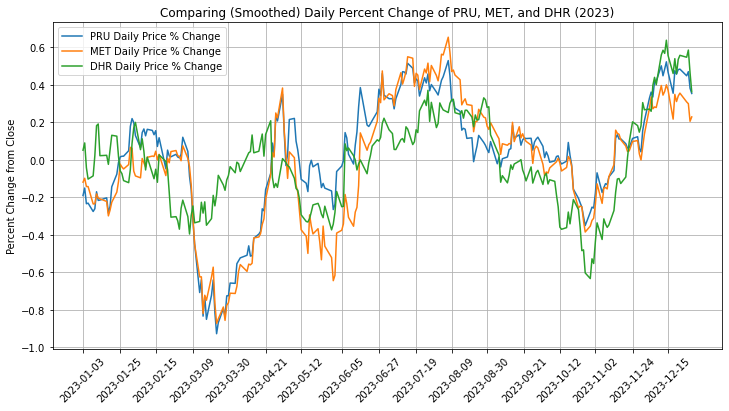

In [91]:
# Plotting PRU correlations against MET and DHR
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_23_PRU.index, data_23_PRU['Smoothed'], label='PRU Daily Price % Change')
ax.plot(data_23_MET.index, data_23_MET['Smoothed'], label='MET Daily Price % Change')
ax.plot(data_23_DHR.index, data_23_DHR['Smoothed'], label='DHR Daily Price % Change')

# Setting x-axis ticks every 15 days
every_n = 15
ax.set_xticks(data_23_PRU.index[::every_n])
ax.tick_params(axis='x', rotation=45)
ax.set_title("Comparing (Smoothed) Daily Percent Change of PRU, MET, and DHR (2023)")
ax.set_ylabel("Percent Change from Close")
ax.grid(True)
ax.legend()
plt.show()

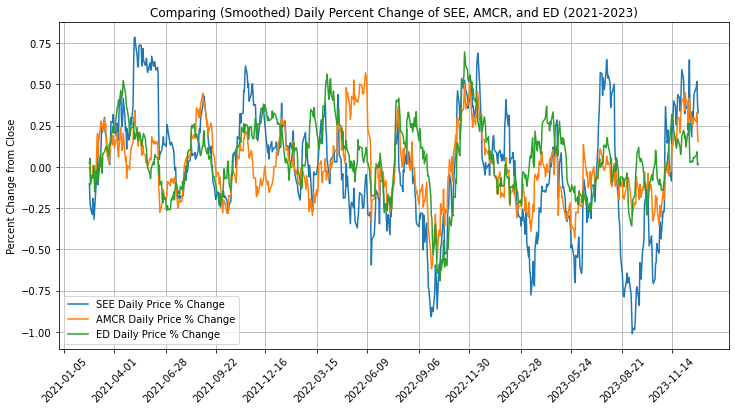

In [92]:
# Plotting SEE correlations against AMCR and ED
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_21_23_SEE.index, data_21_23_SEE['Smoothed'], label='SEE Daily Price % Change')
ax.plot(data_21_23_AMCR.index, data_21_23_AMCR['Smoothed'], label='AMCR Daily Price % Change')
ax.plot(data_21_23_ED.index, data_21_23_ED['Smoothed'], label='ED Daily Price % Change')

# Setting x-axis ticks every 60 days
every_n = 60
ax.set_xticks(data_21_23_SEE.index[::every_n])
ax.tick_params(axis='x', rotation=45)
ax.set_title("Comparing (Smoothed) Daily Percent Change of SEE, AMCR, and ED (2021-2023)")
ax.set_ylabel("Percent Change from Close")
ax.grid(True)
ax.legend()
plt.show()

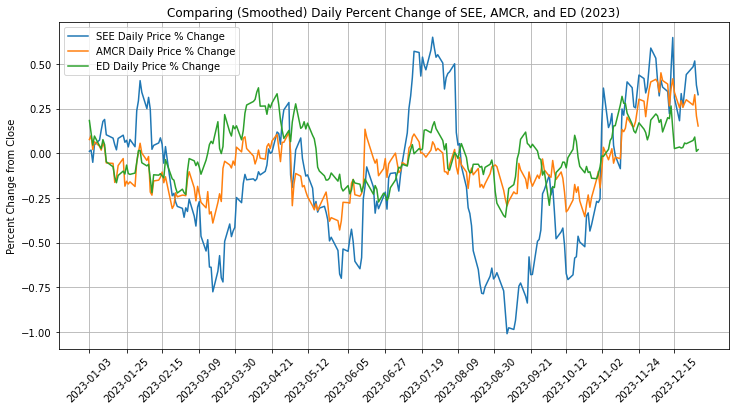

In [93]:
# Plotting SEE correlations against AMCR and ED
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_23_SEE.index, data_23_SEE['Smoothed'], label='SEE Daily Price % Change')
ax.plot(data_23_AMCR.index, data_23_AMCR['Smoothed'], label='AMCR Daily Price % Change')
ax.plot(data_23_ED.index, data_23_ED['Smoothed'], label='ED Daily Price % Change')

# Setting x-axis ticks every 15 days
every_n = 15
ax.set_xticks(data_23_AAPL.index[::every_n])
ax.tick_params(axis='x', rotation=45)
ax.set_title("Comparing (Smoothed) Daily Percent Change of SEE, AMCR, and ED (2023)")
ax.set_ylabel("Percent Change from Close")
ax.grid(True)
ax.legend()
plt.show()